# Project 2: Reproducibility in Natural Language Processing



## Part 1: Data Loading and Initial Exploration (15 pts)

The data for this project is stored in the `data` folder in your repositories, in the `SOTU.csv` file. The data file is structured as a CSV with columns for president name, speech text, year, and word count in the speech. 

In this section you will:

1. Import the data into a pandas dataframe
2. Perform exploratory data analysis (EDA) including specifically:
- Analyze the number of speeches per president
- Analyze the number of speeches per year
- Analyze the word count distribution
- Analyze the word count distribution accross years using a rug plot
- Analyze the average word count per president
3. Write commentary on your findings

First, create the `conda` environment with the provided yaml file. Note, it's not unusual for it to take ~15 minutes for the environment to fully install.

### Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [2]:
!pip install spacy
import spacy
!python -m spacy download en_core_web_sm

  Using cached spacy-3.8.11-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.15-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (2.3 kB)
  Using cached cymem-2.0.13-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (9.7 kB)
  Using cached preshed-3.0.12-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (2.5 kB)
  Using cached thinc-8.3.10-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached wea

In [3]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like
sou = pd.read_csv('data/SOTU.csv')

In [4]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### Exploratory Data Analysis

Replicate the plots below using the hints specified. For each plot, provide some commentary describing the results/anything interesting you might see.

#### Number of Speeches per President

In [5]:
# Hint - use value_counts() on the President column
# Hint - sort in order of dataframe
counts = sou["President"].value_counts(sort=False)

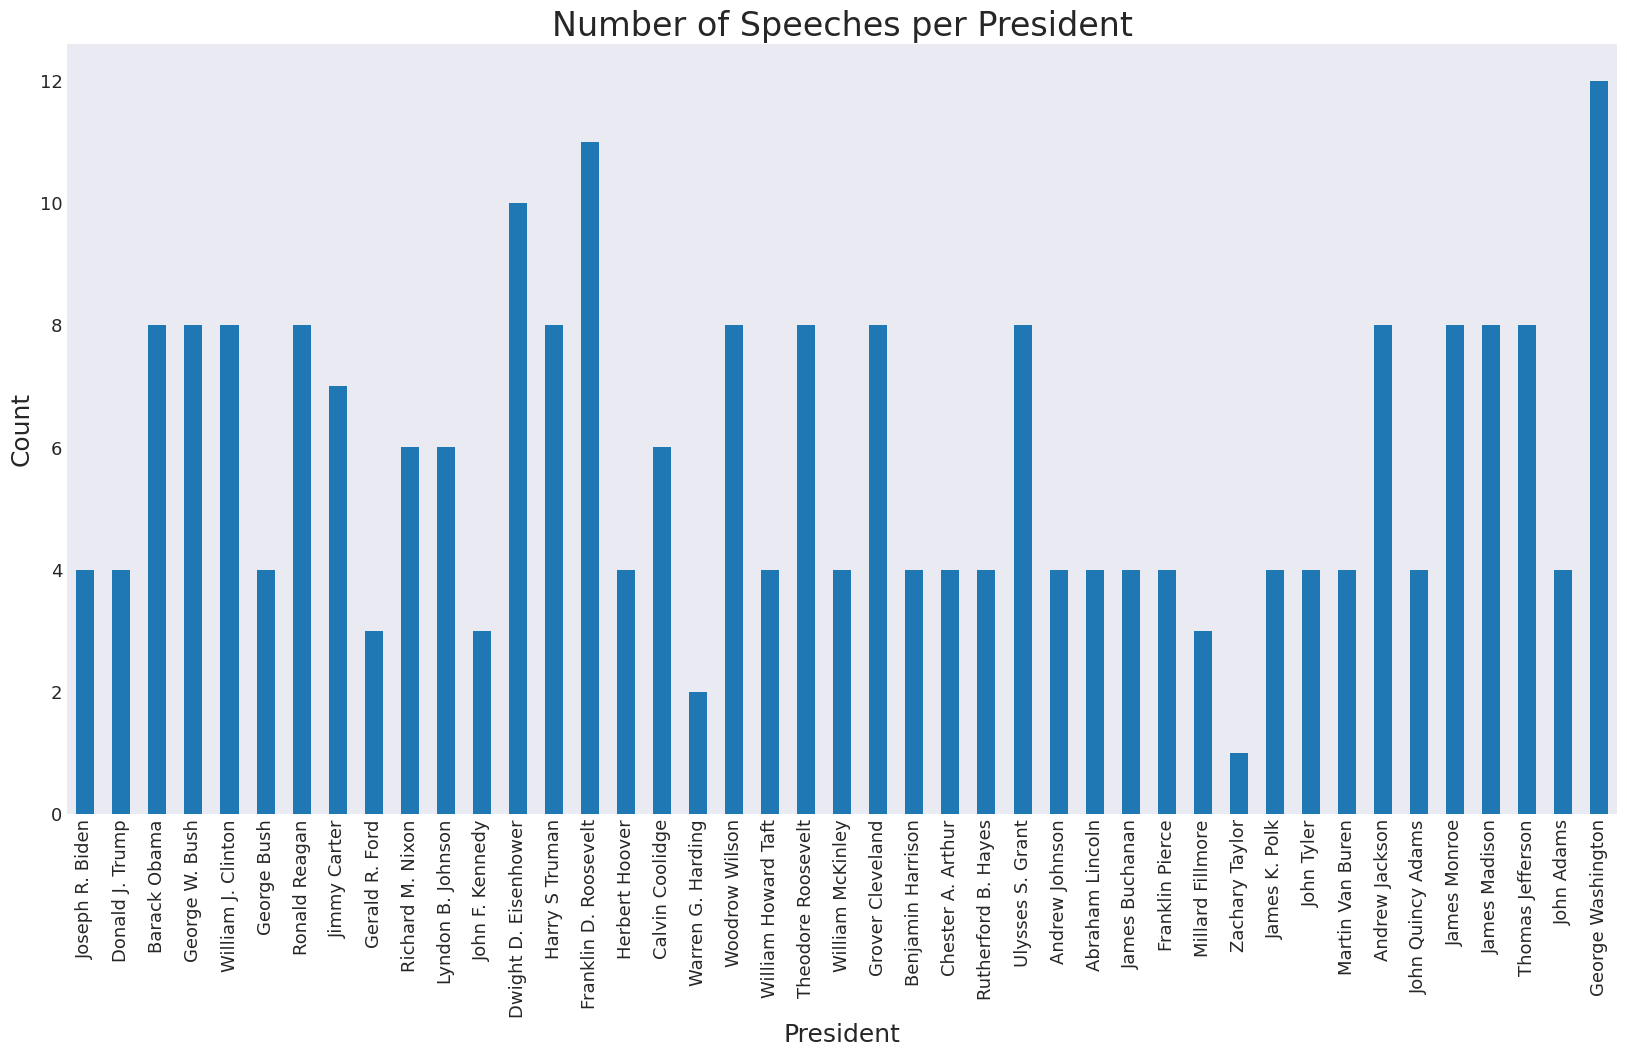

In [6]:
# Plot 
# Hint - use the .plot() method for Pandas Series, make sure all presidents show up on x-axis

counts.plot(kind="bar", figsize=(20, 10))
plt.title("Number of Speeches per President", fontsize=24)
plt.xlabel("President", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)

plt.show()

#### Number of Speeches per Year

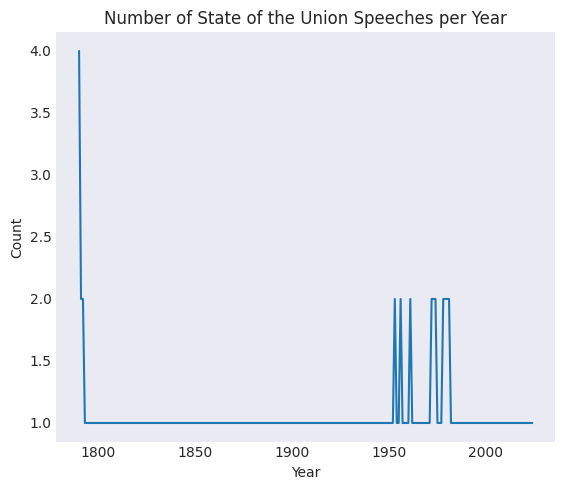

In [7]:
# Hint - Use value counts and sort by years
counts_by_year = sou["Year"].value_counts().sort_index()

plt.figure(figsize=(5.75, 5))
counts_by_year.plot(kind="line")

plt.title("Number of State of the Union Speeches per Year")
plt.xlabel("Year")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Word Count Distribution 

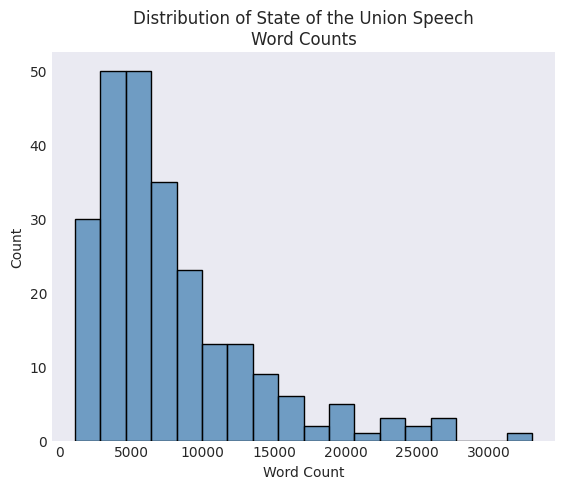

In [8]:
# Hint - try seaborn.histplot()

plt.figure(figsize=(5.75, 5))

sns.histplot(
    sou["Word Count"],
    bins=18,
    kde=False,
    color="steelblue"
)

plt.title("Distribution of State of the Union Speech\nWord Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### Word Count Distribution over Year

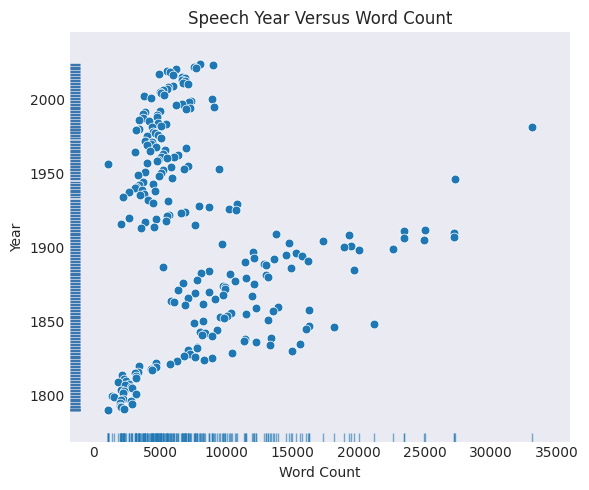

In [9]:
# Hint: try seaborn.rugplot()
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year",
    s=40
)

sns.rugplot(
    data=sou,
    x="Word Count",
    height=0.02,
    alpha=0.6,
)

sns.rugplot(
    data=sou,
    y="Year",
    height=0.02,
    alpha=1,
    color=(59/255, 117/255, 174/255)
)

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")

plt.tight_layout()
plt.show()

#### Word Count Distribution per President

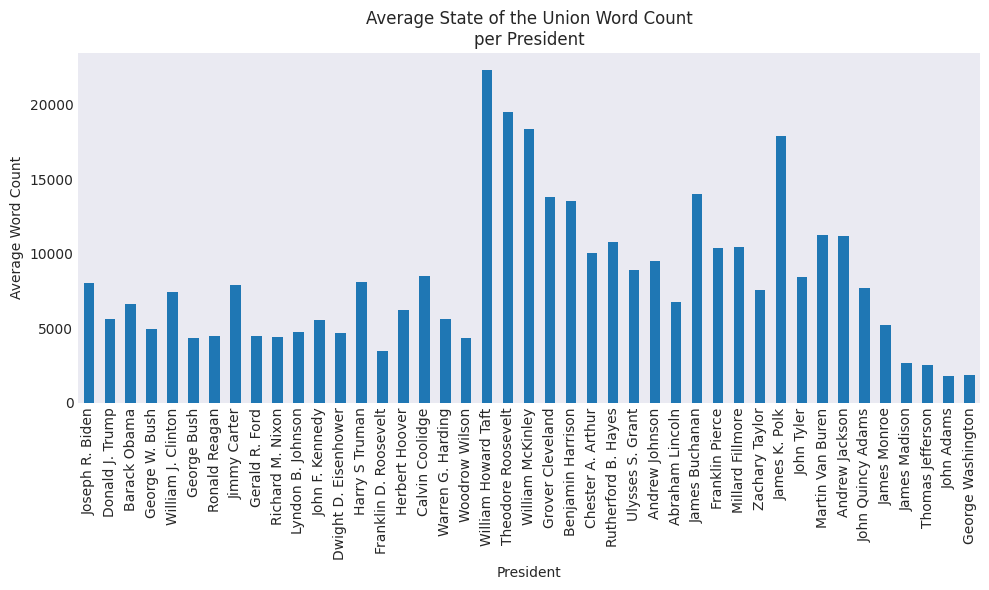

In [10]:
# Hint: use pandas groupby to get mean word count per president then sort by order

avg_words = sou.groupby("President")["Word Count"].mean()

avg_words = avg_words.loc[sou["President"].unique()]
plt.figure(figsize=(10, 6))
avg_words.plot(kind="bar")

plt.title("Average State of the Union Word Count\nper President")
plt.xlabel("President")
plt.ylabel("Average Word Count")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)

Now we will start working on simple text processing using the `SpaCy` package and the same dataset as Part 1. The package should already be included in the `environment.yml`. However, we will also need to download `en_core_web_sm`, an English language text processing model. To do this, while having your `sotu` environment activated, run the following:

```
python -m spacy download en_core_web_sm
```

Now, you should be good to go!

Some important definitions:

- *Token*: a single word or piece of a word
- *Lemma*: the core component of a word, e.g., "complete" is the lemma for "completed" and "completely"
- *Stop Word*: a common word that does not add semantic value, such as "a", "and", "the", etc.
- *Vectorization*: representing a document as a vector where each index in the vector corresponds to a token or word and each entry is the count.

In this section, we will explore the most common tokens and lemmas throughout different slices of the speech data. We will also develop vectorization representations of the speeches. 

 The core steps are:

1. Process speeches using the SpaCy nlp module
2. Analyze Tokens vs Lemmas:
- Create a list of all tokens across all speeches that are not stop words, punctuation, or spaces.
- Create a second list of the lemmas for these same tokens.
- Display the top 25 for each of these and compare.
3. Analyze common word distributions over different years:
- Create a function that takes the dataset and a year as an input and outputs the top n lemmas for that year's speeches
- Compare the top 10 words for 2023 versus 2019
4. Document Vectorization:
- Train a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization model using your processed dataset and scikit learn
- Output the feature vectors 

**Helpful Resources:**
- https://realpython.com/natural-language-processing-spacy-python/
- https://www.statology.org/text-preprocessing-feature-engineering-spacy/ 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html# 
- https://www.geeksforgeeks.org/nlp/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/ 



### Processing Speeches with SpaCy

Lets study just speeches from 2000 and onwards to begin with. So, be sure to subset your DataFrame to just these speeches before continuing!

In [11]:
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [12]:
sou_new = sou[sou['Year'] >= 2000]
sou_new

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


In [13]:
processed_speeches = []

for i in range(len(sou_new)):
    speech_text = sou_new.loc[i, 'Text'] 
    processed = nlp(speech_text)    
    processed_speeches.append(processed)


### Analyze Tokens vs Lemmas

#### Token List

Create a list of tokens across all speeches that are not spaces, stopwords, or punctuation. Make each token lowercase as well. *Hint: each element of the list we just created are themselves lists of tokens. Token objects have attributes `is_stop`, `is_punct`, and `is_space`.*

In [14]:
tokens = []

for speech in processed_speeches:
    for token in speech:
        if not token.is_punct and not token.is_space and not token.is_stop:
            tokens.append(token.text.lower())



In [15]:
# print top 20 tokens
token_counts = Counter(tokens).most_common(20)
token_counts


[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

Do the same as above, but for lemmas. *Hint: recall lemmas are components of words. Each token should have an attribute to extract the lemma.*

In [16]:
lemmas = []

for word in tokens:
    doc = nlp(word)  
    for token in doc:
        lemmas.append(token.lemma_.lower())


In [17]:
# print top 20 lemmas
lemma_counts = Counter(lemmas).most_common(20)
lemma_counts

[('year', 845),
 ('america', 821),
 ('people', 639),
 ('american', 582),
 ('work', 566),
 ('new', 532),
 ('job', 503),
 ('americans', 437),
 ('country', 435),
 ('world', 426),
 ('nation', 402),
 ('know', 396),
 ('help', 387),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 334),
 ('state', 326),
 ('let', 326),
 ('congress', 319)]

#### Token versus Lemma Comparison

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

Tokens 'years' and 'year' are common tokens, appearing in the 5th and 7th most common slots, respectively. The lemma 'year'
is the most popular lemma and its occurance is the sum of the occurences of its similar tokens. Although 'child' does not appear in the top 20 tokens, it does appear as the 17th most common lemma. This could be becuase there are many tokens related to the lemma 'child' such as 'child,' 'children,' 'childish,' and 'childrens'.' This is twice the amount of tokens related to the same lemma of 'child' as there is for the lemma of 'year.'

### Common Words

#### Common Words per Year Function

Fill in the below function to obtain the n-most common words in speeches for a given year.

inputs: 
- df raw unprocessed sou dataframe
- year
- n
outputs: 
- top n words for that years

steps:
- subset the dataframe for the year of interest - note the years might not be in int type
- process the subsetted dataframe with spacy
- get the lemmas across all those speeches
- count the top n lemmas

In [18]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speech for a given year and returns
    the most common non-stopword/punctuation lemmas.

    INPUTS
    - raw unprocessed sou data frame
    - year

    OUTPUTS
    - top n words for that year
    """

    # Step 1: Subset df
    new_df = df[df['Year'] == year]
    
    # Step 2: Process the text with spaCy
    new_df = df[df['Year'] == year].reset_index(drop=True) 
    processed_speeches = []

    for i in range(len(new_df)):
        speech_text = new_df.loc[i, 'Text'] 
        processed = nlp(speech_text)    
        processed_speeches.append(processed)
    
    # Step 3: Get lemmas
    lemmas = []

    for doc in processed_speeches:
        for token in doc:
            if not token.is_punct and not token.is_space and not token.is_stop:
                lemmas.append(token.lemma_.lower())
    
    lemma_counts = Counter(lemmas).most_common(n)
    
    return lemma_counts

In [19]:
# test it on 2024
get_most_common_words(sou, 2024, n=20)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29),
 ('pay', 29),
 ('come', 26),
 ('home', 25),
 ('family', 24),
 ('future', 23),
 ('million', 23),
 ('like', 21),
 ('build', 21),
 ('laughter', 20),
 ('americans', 20)]

#### Compare 2023 to 2017

Run your function from the previous step to get the top 20 words for 2017 and 2023. Plot the words and their frequencies in a barchart and replicate the figure below.

In [20]:
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

In [21]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [22]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [23]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=['lemma', 'count'])
df_2023 = pd.DataFrame(words_2023, columns=['lemma', 'count'])

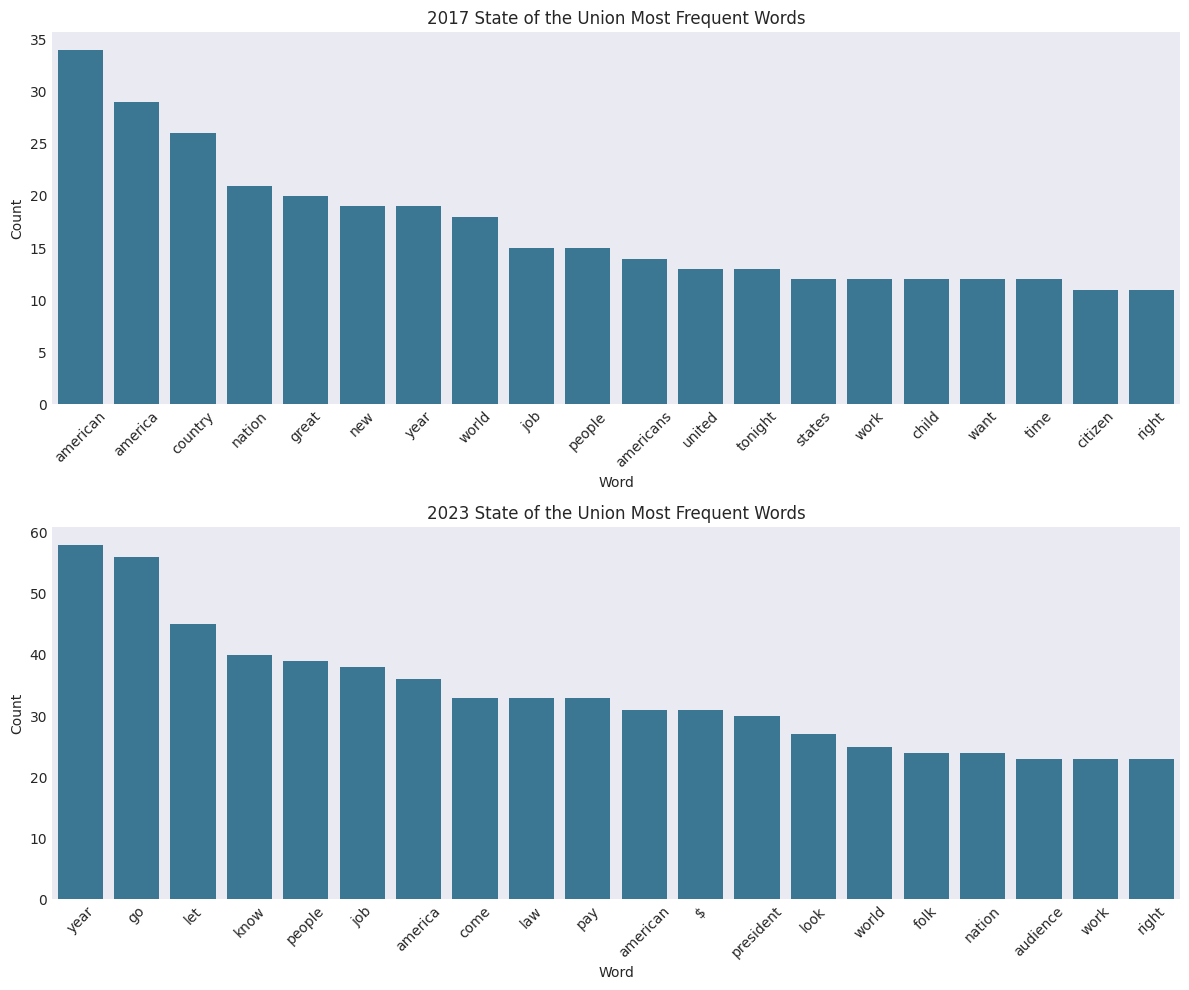

In [24]:
# Hint - use seaborn, subplots, and rotate tick labels

fig, axes = plt.subplots(2, 1, figsize=(12, 10)) 
# Plot 2017
sns.barplot(
    x = 'lemma',
    y = 'count',
    data = df_2017,
    ax = axes[0],
     color='#2C7BA1'
    
)
axes[0].set_title('2017 State of the Union Most Frequent Words')
axes[0].set_xlabel('Word')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45) 

# Plot 2023
sns.barplot(
    x='lemma',
    y='count',
    data=df_2023,
    ax=axes[1],
    color='#2C7BA1'
)

axes[1].set_title('2023 State of the Union Most Frequent Words')
axes[1].set_xlabel('Word')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

### TF-IDF Vectorization

To use statsitical alorithms on documents, we need to transform them into vectors, where each element of the vector corresponds to a particular word in a document or corpus of documents. One common way is via TF-IDF embeddings. LLMs work similarly - they typically use transformer models to generate text embeddings before sending text through a deep neural network. 

Here we will fit a TF-IDF vectorizer, plot all the speeches on a 2-D grid using PCA and also using a heatmap, and examine TF-IDF scores for the top 10 most common words in the first speech. This is a good resource here: https://medium.com/GeoffreyGordonAshbrook/vector-visualization-2d-plot-your-tf-idf-with-pca-83fa9fccb1d 

In [25]:
# Install nlk to current kernel only once, can do from terminal 
#(has been added to environment.yml too so if using this, do not have to install in notebook)

import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])

# confirm the version that was just installed
import nltk
print("NLTK version:", nltk.__version__)

NLTK version: 3.9.2


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.tokenize.casual import casual_tokenize

#### Train the Vectorizer and Transform the Data

In [27]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [28]:
##########################
# Minimal TF-IDF Vectors (Reference: Vector Visualization by Ashbrook)
##########################

# Select Model
tfidf_model = TfidfVectorizer()

# Fit Model
tfidf_vectors = tfidf_model.fit_transform(raw_docs).toarray()

The output of `fit_transform()` will be a matrix where each row corresponds to a speech, each column corresponds to a word in the corpus of speeches, and the value is the TF-IDF score which measures the importance of that word in that speech, relative to the rest of the speeches.

#### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

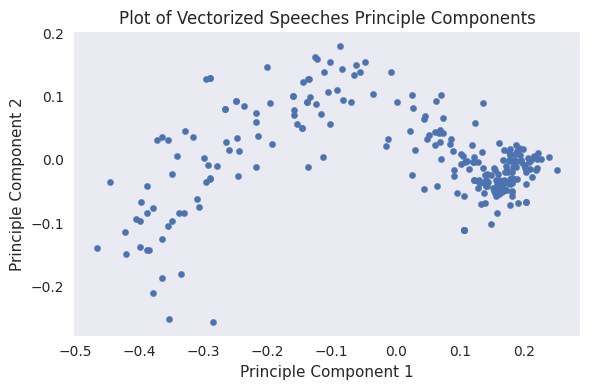

In [29]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)

# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
speeches_array = tfidf_vectors
speeches_df2d = pd.DataFrame(pca.fit_transform(speeches_array), columns=list('xy'))

# Plot Data Visualization (Matplotlib)

# Plot (matplotlib only)
plt.style.use('seaborn-v0_8')           # just a style; still matplotlibplt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
plt.scatter(speeches_df2d['x'], speeches_df2d['y'], s=20)
plt.xlabel('Principle Component 1'); plt.ylabel('Principle Component 2'); plt.title('Plot of Vectorized Speeches Principle Components')
plt.grid(False)
plt.tight_layout(); plt.show()


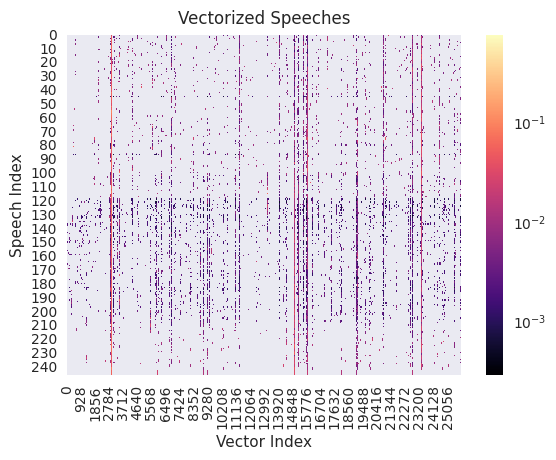

In [30]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

# vectorized_docs: scipy sparse matrix (rows=speeches, cols=tokens)
A = tfidf_vectors.astype(np.float32)   # densify

# Log scale needs vmin > 0; pick the smallest positive value
pos_min = A[A > 0].min() if (A > 0).any() else 1e-6

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(5.8, 4.7))

ax = sns.heatmap(
    A,
    cmap="magma",
    norm=LogNorm(vmin=pos_min, vmax=A.max()),
    cbar_kws={"format": mticker.LogFormatterMathtext()}
)

ax.set_title("Vectorized Speeches", pad=8)
ax.set_xlabel("Vector Index")
ax.set_ylabel("Speech Index")

n_cols = A.shape[1]
step = 928         
xticks = np.arange(0, n_cols, step)

ax.xaxis.set_major_locator(FixedLocator(xticks))
ax.xaxis.set_major_formatter(FixedFormatter([str(v) for v in xticks]))
plt.setp(ax.get_xticklabels(), rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

#### Get the TF-IDF value for certain words and documents

In [31]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [32]:
word_nums = [tfidf_model.vocabulary_[w] for w in word_list] # get each word's index number using the .vocabular_ attributed of vectorizer

In [33]:
idf_score = tfidf_model.idf_[word_nums] # get their IDF score by using .idf_ at the indices from the previous step

In [34]:
tf_idf = tfidf_vectors[0, word_nums] # get the tf_idf score for the first speech

In [35]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438


## Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)

**Resources:**
- LDA:
    - https://medium.com/sayahfares19/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06 
    - https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim#%F0%9F%93%9A-Topic-Modeling (code for previous post)
    - https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf/ 
- BERTopic:
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_documents.html#visualize-documents-with-plotly 
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_topics.html 


In [36]:
import spacy
from tqdm import tqdm
from collections import Counter
import pandas as pd

# imports
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

sou = pd.read_csv('data/SOTU.csv')
nlp = spacy.load("en_core_web_sm")

In [37]:
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

/home/jovyan/envs/sotu/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### LDA

- Train an LDA model with 18 topics
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization

You may use the next two cells to process the data.

In [38]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [39]:
# Process all texts - note this takes ~ 5 minutes to run
processed_docs = sou['Text'].apply(preprocess_text)

To train an LDA model, use the LdaModel function that we imported a couple of cells back. The last resource linked under the LDA section is especially useful for walking through the steps we have below. *Note: one of the arguments to the LdaModel function is `random_state` which specifies the random seed for reproducibility. Please set yours to 42. Further, the last resource provided uses `LdaMulticore` which is essentially a parallelizable version of our function `LdaModel`. Use `LdaModel` instead, but the usage will be similar, except you can ignore the `iterations` and `workers` arguments..*.

In [40]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches

sou['tokens'] = processed_docs
#Gensim Dictionary object maps each word to their unique ID:
dictionary = Dictionary(sou['tokens'])
#print(dictionary.token2id)
#dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

#create sparse vector (i, j) where i is dictionary id and j is number of occurences of that distinct word (?)
corpus = [dictionary.doc2bow(doc) for doc in sou['tokens']]

In [41]:
# train LDA model with 18 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=18, random_state=42, passes=10)

In [42]:
# print the top 10 words for each topic
lda_model.print_topics(-1)

[(0,
  '0.013*"states" + 0.013*"government" + 0.009*"united" + 0.008*"congress" + 0.007*"country" + 0.006*"year" + 0.006*"public" + 0.006*"great" + 0.005*"state" + 0.005*"power"'),
 (1,
  '0.002*"year" + 0.002*"people" + 0.002*"government" + 0.001*"states" + 0.001*"congress" + 0.001*"country" + 0.001*"nation" + 0.001*"great" + 0.001*"time" + 0.001*"united"'),
 (2,
  '0.003*"year" + 0.003*"government" + 0.002*"states" + 0.002*"congress" + 0.002*"united" + 0.002*"people" + 0.002*"great" + 0.002*"service" + 0.002*"public" + 0.001*"increase"'),
 (3,
  '0.015*"year" + 0.011*"world" + 0.011*"people" + 0.011*"america" + 0.010*"nation" + 0.007*"help" + 0.007*"congress" + 0.007*"american" + 0.007*"work" + 0.006*"time"'),
 (4,
  '0.009*"isthmus" + 0.006*"colombia" + 0.005*"government" + 0.004*"states" + 0.004*"panama" + 0.004*"united" + 0.004*"colombian" + 0.004*"treaty" + 0.003*"year" + 0.003*"congress"'),
 (5,
  '0.003*"year" + 0.002*"government" + 0.002*"nation" + 0.001*"united" + 0.001*"coun

In [43]:
# print the topic distribution for the first speech
sou['Text'][0]
lda_model[corpus][0]

[(7, np.float32(0.9997309))]

The first speech is 99% belonging to topic 2!

In [44]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()

lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


In [45]:
#save to outputs
pyLDAvis.save_html(lda_display, 'outputs/lda_topics.html')

### BERTopic

- Train a BERTopic model with a `min_topic_size` of 3 *Hint: use `BERTopic` to instantiate the model and specify `min_topic_size` in here. Actually fit the model using `fit_transform`, which `docs` passed into this.*
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization of the topics (see topic_model.visualize_topics())

In [46]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
docs = sou['Text'].to_list()

In [48]:
# train the model - this takes about 30 seconds
topic_model = BERTopic(min_topic_size=3)
topics, probs = topic_model.fit_transform(docs)


# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)
vectorizer_model = CountVectorizer(stop_words="english")
topic_model.update_topics(docs, vectorizer_model=vectorizer_model) 

In [49]:
# output the top 10 words for each topic - hint see get_topic_info
topic_model.get_topic_info()['Representation']

0     [government, states, congress, year, united, n...
1     [states, government, united, congress, public,...
2     [government, united, states, department, congr...
3     [government, public, work, congress, great, la...
4     [world, peace, nations, soviet, economic, nati...
5     [world, american, america, president, people, ...
6     [states, government, united, constitution, con...
7     [america, people, americans, american, tonight...
8     [government, states, law, united, gold, congre...
9     [national, federal, government, public, congre...
10    [new, world, people, american, help, ask, amer...
11    [government, public, states, subject, general,...
12    [people, world, health, new, american, work, y...
13    [america, iraq, terrorists, security, terror, ...
14    [bank, public, states, government, country, su...
15    [government, shall, congress, world, islands, ...
16    [federal, tax, people, america, budget, spendi...
17    [states, congress, government, public, uni

In [50]:
# output the topic distribution for the first speech
topic_distr, _ = topic_model.approximate_distribution(docs)
first_speech_viz = topic_model.visualize_distribution(topic_distr[1])

#save first speech topic distribution to outputs
first_speech_viz.write_html("outputs/BERTopic_first_speech_viz.html")
first_speech_viz

In [51]:
# run this cell to visualize the topics
viz_topics = topic_model.visualize_topics()

#save topic visualizations to output
viz_topics.write_html("outputs/BERTopic_topics_viz.html")
viz_topics

## Discussion and Reflections

The topic distribution across the two dimensional PCA is notably different for the LDA (bag of words) and BERTopic (semantic similarity) approaches. The LDA distribution appears to have larger clusters on the right quadrant of the analyses, with significantly smaller clusters on the left quadrant. On the other hand, the BERTopic distributions land in each quadrant of the PCA grid, with more even distribution between each in terms of cluster size. This demonstrates how the two approaches use different attributes of the speeches and different algorithms to conclude topic summaries and distributions.

## Part 4: Choose your own advecnture! (7 Points; Optional for Extra Credit)

This section is open ended and your chance to explare any advanced analysis. Please perform any additional analysis you find interesting! Suggested analyses (only do one max):

- Topic evolution over time - see https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html#visualization 
- Word frequency over time - does the frequency of certain words change over time
- Semantic similarity - investigate similarity within and between presidents or time periods. For example, similarity between one presidents speeches, e.g. are all of Biden's speeches similar to each other? How similar are they to Trump's speeches? Are speeches from the 2000s more similar to each other than speeches in the 1800s? Which two presidents have the most similar speeches? See https://spacy.io/usage/linguistic-features#vectors-similarity 
-  Named Entity Recognition - which entity types are most common in speeches? What are the most common words for each entity type - see https://spacy.io/usage/linguistic-features#named-entities 
- Classification - can you build a classifier to detect democratic versus republican state of the union speeches from 1980-2024 - see https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py 


### Word frequency over time - does the frequency of certain words change over time

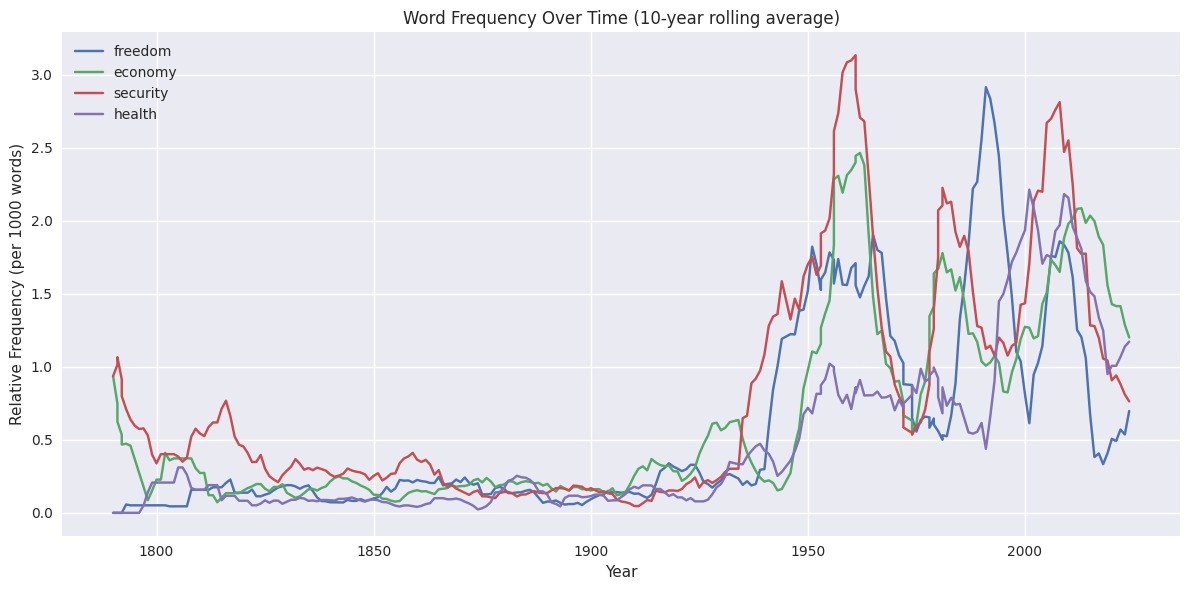

In [52]:
import re

# Define words we think are important in this case
words = ["freedom", "economy", "security", "health"]


def count_word(text, word):
    """
    RegEx Method to find variations of the word (case insensitive)
    """
    pattern = r'\b' + re.escape(word) + r'\b'
    return len(re.findall(pattern, text, flags=re.IGNORECASE))


# Iterate through every word and get the raw count per year and then scale it
for w in words:
    raw_col = f"freq_{w}"
    rel_col = f"rel_freq_{w}"
    sou[raw_col] = sou["Text"].apply(lambda x: count_word(x, w))
    sou[rel_col] = sou[raw_col] / sou["Word Count"] * 1000


# Sort the values every year
sou_sorted = sou.sort_values("Year").reset_index(drop=True)

# Iterate through the words and fit a rolling average
for w in words:
    col = f"rel_freq_{w}"
    sou_sorted[col + "_smooth"] = (
        sou_sorted[col].rolling(window=10, min_periods=3).mean()
    )

plt.figure(figsize=(12, 6))

# Plot for the respective years
for w in words:
    plt.plot(
        sou_sorted["Year"],
        sou_sorted[f"rel_freq_{w}_smooth"],
        label=w
    )

plt.title("Word Frequency Over Time (10-year rolling average)")
plt.xlabel("Year")
plt.ylabel("Relative Frequency (per 1000 words)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Freedom

Mentions of freedom stay low throughout the 1800s, then gradually increase in the early 20th century. The term spikes sharply during the Cold War (1970s–1990s), when U.S. presidents frequently framed politics in ideological terms. Another noticeable peak appears in the early 2000s during the post-9/11 era, when “freedom” became central to national messaging. Through time, “freedom” becomes a major rhetorical theme primarily in the modern era.

#### Economy

The word economy remains rarely used before 1900, but rises significantly during major economic crises. There are clear peaks during the Great Depression (1930s), post-WWII recovery, the stagflation era (1970s), and again around the Great Recession (2008–2010). The pattern reflects how presidents address economic instability directly in their State of the Union speeches.

#### Security

Security shows the strongest spikes of any word. Usage jumps dramatically during World War II, peaks again throughout the Cold War, and rises once more after 2001 in response to terrorism and national security concerns. This term closely tracks periods when the nation faces real or perceived threats, making it the most crisis-driven word in the group.

#### Health

Mentions of health are almost nonexistent before the 20th century. Use rises steadily as the federal government becomes more involved in public health policy—especially around the creation of Medicare and Medicaid (1960s), health reform debates in the 1990s, the Affordable Care Act period (2009–2015), and again around 2020 during the COVID-19 pandemic. “Health” is the newest major theme in modern SOTU speeches.

#### Overall Summary

Across all four words, usage stays low before 1900 and rises sharply in the modern era as speeches become more policy-focused. The trends reveal how presidential priorities evolve: “security” peaks during wars and threats, “economy” during financial crises, “freedom” during ideological conflicts, and “health” during healthcare policy shifts and pandemics. Together, these patterns highlight how State of the Union language reflects broad historical changes in national concerns.